In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('seaborn')
my_cmap = sns.light_palette("Navy", as_cmap=True)

In [204]:
train_data = pd.read_excel('data/2023-E2-Finding-Vulnerabilities-Training.xlsx')
experiment_data = pd.read_excel('data/2023-E2-Finding-Vulnerabilities-Experiment.xlsx')

In [205]:
experiment_data.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName',
       'RecipientEmail', 'ExternalReference', 'DistributionChannel',
       'UserLanguage', 'Q49_4', 'Q128', 'Q129', 'Which Group',
       'Coder Experience', 'WorkingJava', 'FindingVulns', 'Timing_First Click',
       'Timing_Last Click', 'Timing_Page Submit', 'Timing_Click Count',
       'PathLines', 'PathMotivation ', 'InjectionLines', 'InjectionMotivation',
       'XSSLines ', 'XSSMotivation', 'DoSLines', 'DoSMotivation',
       'Familiar.Java', 'Familiar.Vuln', 'Difficulty.Marks_1',
       'Difficulty.Marks_2', 'Difficulty.Marks_3', 'Difficulty.Marks_4',
       'Difficulty.Correct_1', 'Difficulty.Correct_2', 'Difficulty.Correct_3',
       'Difficulty.Correct_4', 'Process.Understand', 'Process.Time',
       'Process.Training', 'Process.Material', 'Process.remarks'],
      dtype='object')

dos_f.java: line 463, 475 <br />
dos_s.java: line 51, 55 <br />
path_f.java: line 368,369,370 <br />
path_s.java: line 76 <br />
user_f.java: line 147,148,151,153,159,163 <br />
user_s.java: line 61,62,66 <br />
xss_f.java: line 441,444,445,446,447 <br />
xss_s.java: line 73,74,75,76 <br />

Group1: dos_s.java; path_f.java; user_s.java; xss_f.java <br />
Group2: dos_f.java; path_s.java; user_f.java; xss_s.java <br />
Group3: dos_f.java; path_s.java; user_s.java; xss_f.java <br />
Group4: dos_s.java; path_f.java; user_f.java; xss_s.java <br />
Group5: dos_f.java; path_f.java; user_s.java; xss_s.java <br />
Group6: dos_s.java; path_s.java; user_f.java; xss_f.java <br />


In [206]:
gt = {'dos_f': [463,475], 'dos_s': [51,55], 
      'path_f': [368,369,370], 'path_s': [76],
      'user_f': [147,148,151,153,159,163], 'user_s': [61,62,66],
      'xss_f': [441,444,445,446,447], 'xss_s': [73,74,75,76]}

gt_outer = {'dos_f': [i for i in range(454,483)], 'dos_s': [i for i in range(47,60)], 
            'path_f': [i for i in range(361,435)], 'path_s': [i for i in range(75,97)],
            'user_f': [i for i in range(142,168)], 'user_s': [i for i in range(58,70)],
            'xss_f': [i for i in range(425,459)], 'xss_s': [i for i in range(65,80)]}

group = {'Group1':['dos_s','path_f','user_s','xss_f'],
         'Group2':['dos_f','path_s','user_f','xss_s'],
         'Group3':['dos_f','path_s','user_s','xss_f'],
         'Group4':['dos_s','path_f','user_f','xss_s'],
         'Group5':['dos_f','path_f','user_s','xss_s'],
         'Group6':['dos_s','path_s','user_f','xss_f']}

In [207]:
experiment_data.where(experiment_data['Q129']=='Yes', inplace=True)
train_data.where(train_data['Agree']=='Yes', inplace=True)
train_data.dropna(how='all', inplace=True)
experiment_data.dropna(how='all', inplace=True)
df_group = experiment_data['Which Group'].iloc[1:]
print(df_group.value_counts())

Group4    18
Group6    15
Group3    15
Group2    12
Group1    12
Group5     9
Name: Which Group, dtype: int64


In [208]:
df_valid_data = pd.merge(experiment_data, train_data,  how='inner', left_on=['Q49_4'], right_on = ['StudentIDFiller_4'])
df_valid_data['Which Group'].iloc[1:].value_counts()

Group4    16
Group6    15
Group3    15
Group2    12
Group1    10
Group5     8
Name: Which Group, dtype: int64

Text(0, 0.5, 'Group')

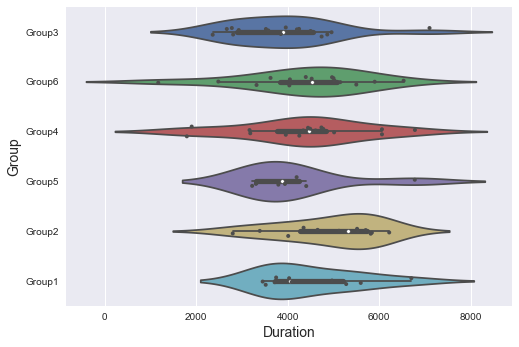

In [209]:
df_valid_data['Duration (in seconds)_x'] = pd.to_numeric(df_valid_data['Duration (in seconds)_x'])
df_valid_data['Duration (in seconds)_y'] = pd.to_numeric(df_valid_data['Duration (in seconds)_y'])
sns.violinplot(data=df_valid_data[['Duration (in seconds)_x', 'Which Group']], x="Duration (in seconds)_x", y="Which Group")

# Add in points to show each observation
sns.stripplot(data=df_valid_data[['Duration (in seconds)_x', 'Which Group']], x="Duration (in seconds)_x", y="Which Group",
              size=4, color=".3", linewidth=0)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Group', fontsize=14)

In [210]:
x = df_valid_data['PathLines'][0].split(';')
len(x[0])

127

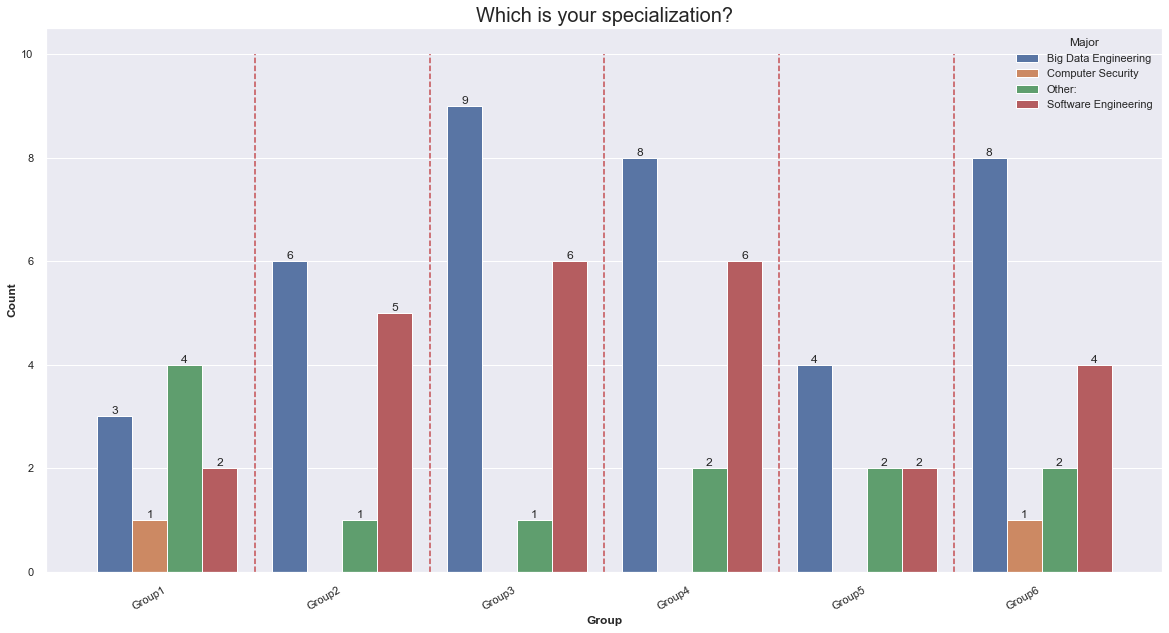

In [372]:
df_process_understand = df_valid_data[['Q120','Which Group','Agree']].groupby(['Q120','Which Group']).count()
df_process_understand.reset_index(inplace=True)
df_process_understand
df_process_understand.columns = ['Major', 'Group', 'Count']
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Group', y='Count', hue='Major', data=df_process_understand, ci=None)
g.set_title("Which is your specialization?", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("Group", fontweight='bold')
g.set_ylabel("Count", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.d')
plt.vlines(0.5, 0, 10, 'r', '--', label='example')
plt.vlines(1.5, 0, 10, 'r', '--', label='example')
plt.vlines(2.5, 0, 10, 'r', '--', label='example')
plt.vlines(3.5, 0, 10, 'r', '--', label='example')
plt.vlines(4.5, 0, 10, 'r', '--', label='example')


In [211]:
# def extract_answer(data, name):
#     def assign_index(answer):
#         if answer == None or answer == np.nan:
#             return 0
#         else:
#             return int(answer)

#     group_result = data[name].str.split(';')
#     # df_answer = pd.Series([list() for _ in range(len(data.index))], index=data.index)
#     for i in group_result:
#         group_result[i]
#         if len(i) > 4:
#             return np.nan
#         else:
#             try:
#                 int(i)
#             except:
#                 if 
#         bool_array = group_result[i].str.split('.',expand=True)[0]
#         bool_array = bool_array.apply(assign_index)
#         for idx in df_answer.index:
#             df_answer.loc[idx].append(bool_array.loc[idx]) if bool_array.loc[idx]!=0 else None
#     return df_answer

## Answer data proprecess

In [417]:
def extend_digit(lis):
    if len(lis) == 2:
        if lis[0] == '':
            return [lis[1]]
        if lis[1] == '':
            return [lis[0]]
        digit1, digit2 = int(lis[0]), int(lis[1])
        min = digit1 if digit1 <= digit2 else digit2
        max = digit2 if digit2 > digit1 else digit1
        return [i for i in range(min, max+1)]
    else:
        return np.nan

def preprocess(x):
    def recursive_process(x):
        x.remove('') if '' in x else None
        new_x = []
        for i in x:
            try:
                new_x.append(int(i))
            except:
                if len(i) <= 1:
                    return []
                elif ',' in i:
                    new_x.extend(list(map(int, str(i).split(','))))
                elif ':' in i:
                    new_x.extend(extend_digit(str(i).split(':')))
                elif '-' in i:
                    new_x.extend(extend_digit(str(i).split('-')))
                else:
                    return []
        return new_x   
    
    if isinstance(x, int):
        return [round(x)]
    if isinstance(x, float):
        if np.isnan(x):
            return []

    if len(x[0]) > 10:
        return []
    else:
        flag, new_x = [], None
        while True:
           new_x = recursive_process(x)
           if flag == new_x or np.isnan(np.nan):
               break
           flag = new_x
        return new_x

df_answer = df_valid_data[['Which Group', 'Q49_4']]
df_valid_data.rename(columns={'XSSLines ': 'XSSLines'}, inplace=True)

answer_list = ['PathLines', 'InjectionLines', 'XSSLines', 'DoSLines']
for ans in answer_list:
    print(ans)
    df_answer = df_answer.merge(df_valid_data[ans].str.split(';').apply(preprocess).rename(ans+'Answer'), left_index=True, right_index=True)
df_answer

PathLines
InjectionLines
XSSLines
DoSLines


,Which Group,Q49_4,PathLinesAnswer,InjectionLinesAnswer,XSSLinesAnswer,DoSLinesAnswer
0,Group3,Amin,[],"[86, 87, 88, 89, 90, 91, 92]","[345, 346, 347, 348, 349, 350, 351, 352, 353, ...","[413, 414, 415, 416, 417, 418, 419, 420, 421, ..."
1,Group6,Zongayao,[75],"[142, 274, 290]",[347],[68]
2,Group4,Sanskar,"[76, 112, 157, 180, 212]",[151],[88],"[76, 112, 157, 180, 212]"
3,Group6,Vishnu Dev,[114],[180],[342],[68]
4,Group3,Abhilash,"[119, 121]",[89],"[434, 445]",[438]
5,Group3,Tim,"[115, 117]","[89, 90]","[467, 468]","[394, 773]"
6,Group4,Shreyas,"[205, 208, 364, 365, 366, 367, 368, 480, 850, ...","[159, 163, 184, 293, 323, 335]","[68, 75]","[55, 76, 77, 109, 119, 137, 228, 229]"
7,Group5,Rick,[854],"[82, 87]",[69],[420]
8,Group3,Nina,"[75, 91, 93, 120]","[59, 62, 66]","[441, 442, 445, 465, 466, 467, 468, 479, 480, ...","[397, 398, 399, 475, 653, 654, 655]"
9,Group2,Ralph,[],"[64, 78]","[70, 76]",[805]


In [224]:
question = ['DoS','Path','Injection','XSS']
df_question_code = pd.DataFrame(df_answer['Which Group'].map(group).to_list(), columns=question)
df_answer_new = df_answer.merge(df_question_code, left_index=True, right_index=True)
for q in question:
    df_answer_new[q+'GT'] = df_answer_new[q].map(gt)
    df_answer_new[q+'GTOuter'] = df_answer_new[q].map(gt_outer)
    df_answer_new[q+'GTCount'] = df_answer_new[q+'GT'].apply(lambda x:len(x))
    df_answer_new[q+'GTOuterCount'] = df_answer_new[q+'GTOuter'].apply(lambda x:len(x))

for q in question:
    df_answer_new[q+'CorrectCount'] = [len(set(a).intersection(b)) for a, b in zip(df_answer_new[q+'GT'], df_answer[q+'LinesAnswer'])]
    df_answer_new[q+'CorrectOuterCount'] = [len(set(a).intersection(b)) for a, b in zip(df_answer_new[q+'GTOuter'], df_answer[q+'LinesAnswer'])]
# df_answer['DoSLinesAnswer'].apply(lambda x:len(set(x).intersection(gt.get('dos_f'))))
df_answer_new.head()

,Which Group,Q49_4,PathLinesAnswer,InjectionLinesAnswer,XSSLinesAnswer,DoSLinesAnswer,DoS,Path,Injection,XSS,...,XSSGTCount,XSSGTOuterCount,DoSCorrectCount,DoSCorrectOuterCount,PathCorrectCount,PathCorrectOuterCount,InjectionCorrectCount,InjectionCorrectOuterCount,XSSCorrectCount,XSSCorrectOuterCount
0,Group3,Amin,[],"[86, 87, 88, 89, 90, 91, 92]","[345, 346, 347, 348, 349, 350, 351, 352, 353, ...","[413, 414, 415, 416, 417, 418, 419, 420, 421, ...",dos_f,path_s,user_s,xss_f,...,5,34,0,0,0,0,0,0,0,0
1,Group6,Zongayao,[75],"[142, 274, 290]",[347],[68],dos_s,path_s,user_f,xss_f,...,5,34,0,0,0,1,0,1,0,0
2,Group4,Sanskar,"[76, 112, 157, 180, 212]",[151],[88],"[76, 112, 157, 180, 212]",dos_s,path_f,user_f,xss_s,...,4,15,0,0,0,0,1,1,0,0
3,Group6,Vishnu Dev,[114],[180],[342],[68],dos_s,path_s,user_f,xss_f,...,5,34,0,0,0,0,0,0,0,0
4,Group3,Abhilash,"[119, 121]",[89],"[434, 445]",[438],dos_f,path_s,user_s,xss_f,...,5,34,0,0,0,0,0,0,1,2


In [232]:
# q+CorrectCount <=> TruePositive
# q+GTCount <=> PositiveCount
for q in question:
    df_answer_new[q+'FP'] = df_answer_new[q+'GTCount'] - df_answer_new[q+'CorrectCount']
    df_answer_new[q+'Precision'] = df_answer_new[q+'CorrectCount'] / df_answer_new[q+'GTCount']
    df_answer_new[q+'OuterPrecision'] = df_answer_new[q+'CorrectOuterCount'] / df_answer_new[q+'GTOuterCount']
    df_answer_new[q+'BoolCorrect'] = df_answer_new[q+'CorrectCount'].apply(lambda x: min(x,1))
    df_answer_new[q+'BoolCorrectOuter'] = df_answer_new[q+'CorrectOuterCount'].apply(lambda x: min(x,1))
    df_answer_new[q+'WrongCount'] = df_answer_new[q+'LinesAnswer'].apply(lambda x:len(x)) - df_answer_new[q+'CorrectCount']
    df_answer_new[q+'WrongOuterCount'] = df_answer_new[q+'LinesAnswer'].apply(lambda x:len(x)) - df_answer_new[q+'CorrectOuterCount']

# for q in question:
#     df_answer_new['TotalGT'] += df_answer_new[q+'GTCount'] 
#     df_answer_new['TotalCorrect'] += df_answer_new[q+'CorrectCount']

### Measurement Per Group

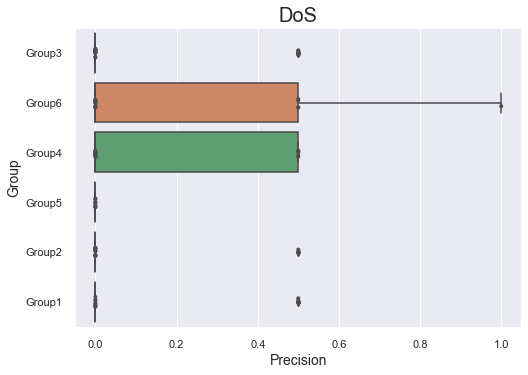

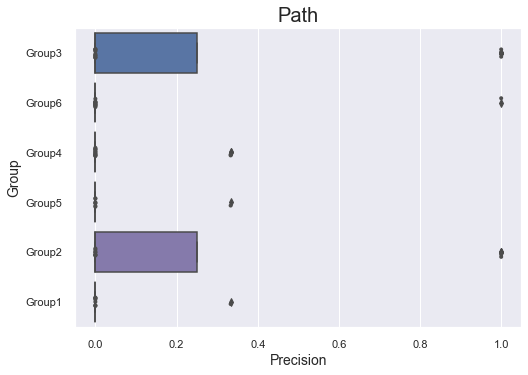

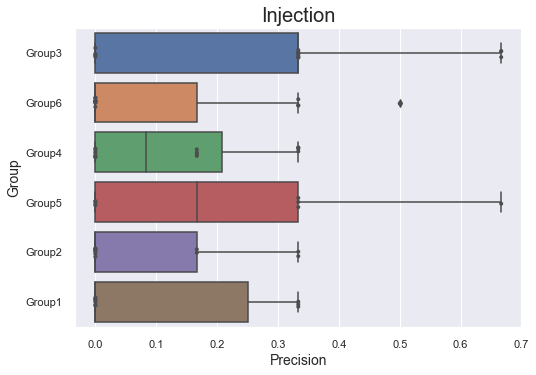

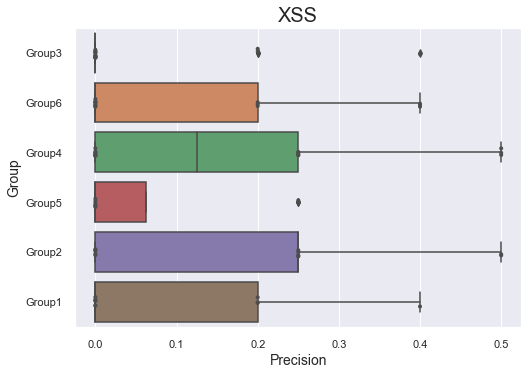

In [393]:
def boxplot_per_group(df, q, metric, title='', xlabel='Precision', ylabel='Group'):
    sns.boxplot(data=df[[q+metric, 'Which Group']], x=q+metric, y="Which Group")

    # Add in points to show each observation
    sns.stripplot(data=df[[q+metric, 'Which Group']], x=q+metric, y="Which Group",
                size=4, color=".3", linewidth=0)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.show()

for q in question:
    boxplot_per_group(df_answer_new, q, 'Precision', title=q)

In [253]:
df_answer_new.where(df_answer_new['Which Group']=='Group1').dropna()[[q+'Precision' for q in question]].describe()

,DoSPrecision,PathPrecision,InjectionPrecision,XSSPrecision
count,10.000000,10.000000,10.000000,10.000000
mean,0.100000,0.033333,0.100000,0.100000
std,0.210819,0.105409,0.161015,0.141421
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.250000,0.200000
max,0.500000,0.333333,0.333333,0.400000


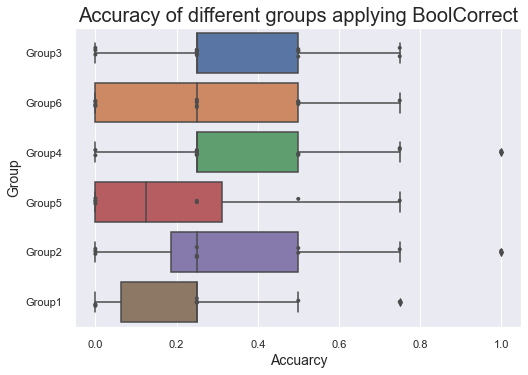

In [396]:
# TruePositive == threshold
total = 4
threshold = 'BoolCorrect'
df_answer_new[threshold] = 0
for q in question:
    df_answer_new[threshold] += df_answer_new[q+threshold]
df_answer_new[threshold+'Accuracy'] = df_answer_new[threshold] / total

boxplot_per_group(df_answer_new, '', threshold+'Accuracy', title='Accuracy of different groups applying BoolCorrect', xlabel='Accuarcy')

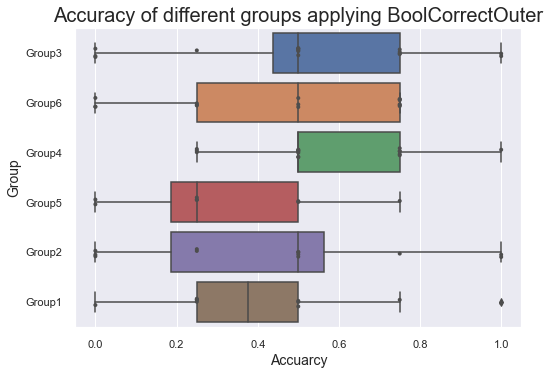

In [397]:
threshold = 'BoolCorrectOuter'
df_answer_new[threshold] = 0
for q in question:
    df_answer_new[threshold] += df_answer_new[q+threshold]
df_answer_new[threshold+'Accuracy'] = df_answer_new[threshold] / total

boxplot_per_group(df_answer_new, '', threshold+'Accuracy', title='Accuracy of different groups applying BoolCorrectOuter', xlabel='Accuarcy')

In [342]:
for q in question:
    df_answer_new[q+'AnswerRecall'] = df_answer_new[q+'CorrectCount'] / (df_answer_new[q+'CorrectCount'] + df_answer_new[q+'WrongCount'])
    df_answer_new[q+'AnswerRecall'].fillna(0, inplace=True)

for q in question:
    print(df_answer_new[['Which Group', q+'AnswerRecall']].groupby('Which Group').agg('mean'))

             DoSAnswerRecall
Which Group                 
Group1              0.114286
Group2              0.050926
Group3              0.083929
Group4              0.179688
Group5              0.000000
Group6              0.177778
             PathAnswerRecall
Which Group                  
Group1               0.033333
Group2               0.065025
Group3               0.074405
Group4               0.019301
Group5               0.020833
Group6               0.022222
             InjectionAnswerRecall
Which Group                       
Group1                    0.133333
Group2                    0.176389
Group3                    0.382440
Group4                    0.328125
Group5                    0.437500
Group6                    0.150000
             XSSAnswerRecall
Which Group                 
Group1              0.270000
Group2              0.388889
Group3              0.105114
Group4              0.364583
Group5              0.166667
Group6              0.277778


In [345]:
for q in question:
    df_answer_new[q+'OuterAnswerRecall'] = df_answer_new[q+'CorrectOuterCount'] / (df_answer_new[q+'CorrectOuterCount'] + df_answer_new[q+'WrongOuterCount'])
    df_answer_new[q+'OuterAnswerRecall'].fillna(0, inplace=True)

# for q in question:
    # print(df_answer_new[['Which Group', q+'OuterAnswerRecall']].groupby('Which Group').agg('mean'))

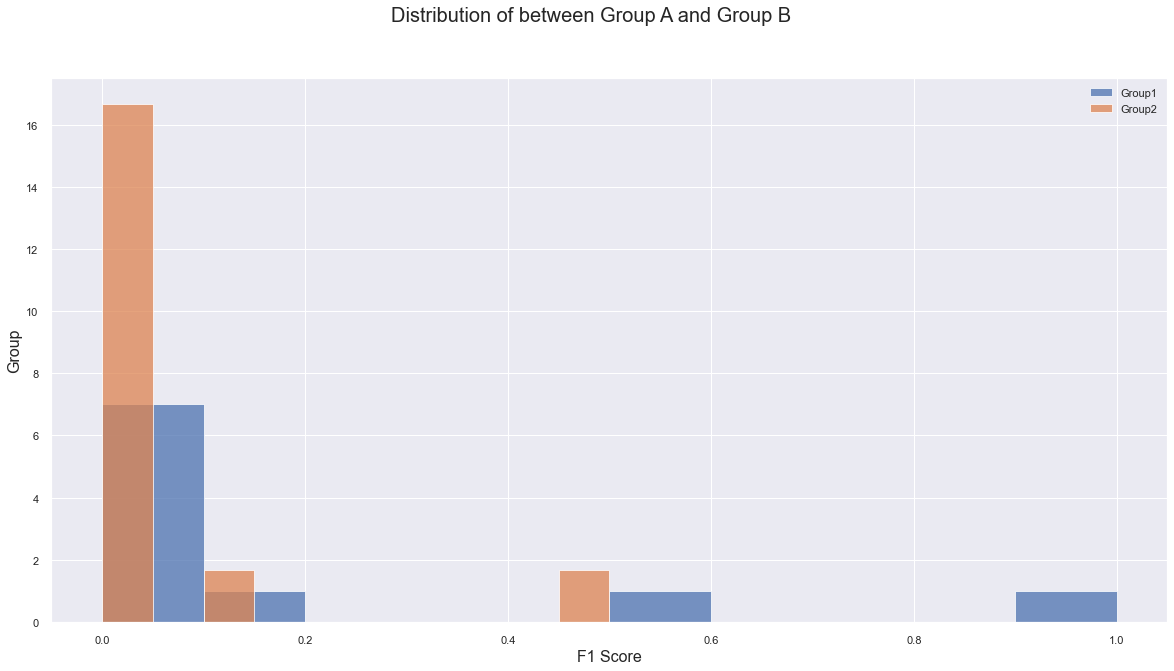

In [346]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

p_bp_male = plt.hist(df_answer_new['DoSOuterAnswerRecall'][df_answer_new['Which Group'] == 'Group1'], label= "Group1",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(df_answer_new['DoSOuterAnswerRecall'][df_answer_new['Which Group'] == 'Group2'], label= "Group2",
                       density= True,
                       alpha=0.75)

plt.legend()
plt.suptitle("Distribution of between Group A and Group B", fontsize= 20)
plt.xlabel("F1 Score", fontsize= 16)
plt.ylabel("Group", fontsize= 16)

# plt.text(0.75, 2.525,
#          f"$\mu= {df_measurement['F1'][df_measurement['Group'] == 'Group A'].mean(): .1f}, \ \sigma= {df_measurement['F1'][df_measurement['Group'] == 'Group A'].std(): .1f}$")
# plt.text(0.55, 2.525,
#          f"$\mu= {df_measurement['F1'][df_measurement['Group'] == 'Group B'].mean(): .1f}, \ \sigma= {df_measurement['F1'][df_measurement['Group'] == 'Group B'].std(): .1f}$")

plt.show()

### Measurement Per Question

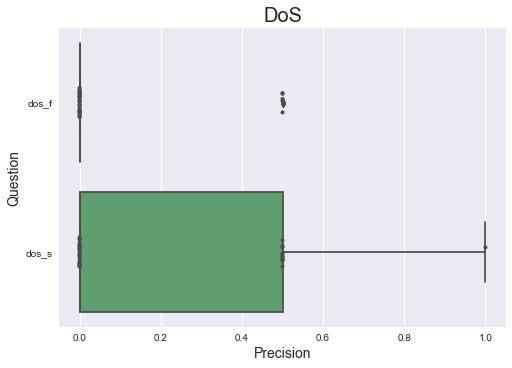

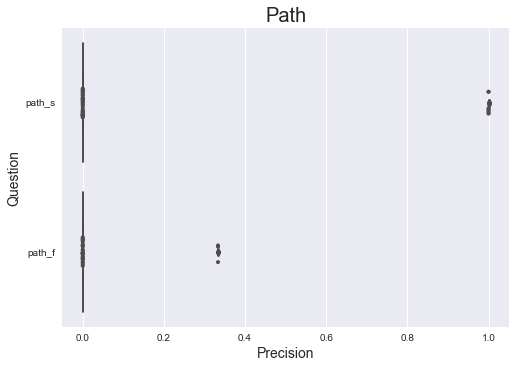

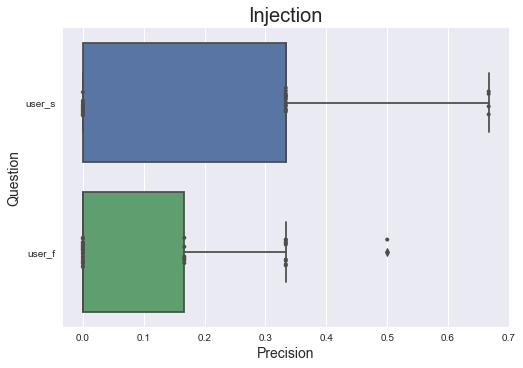

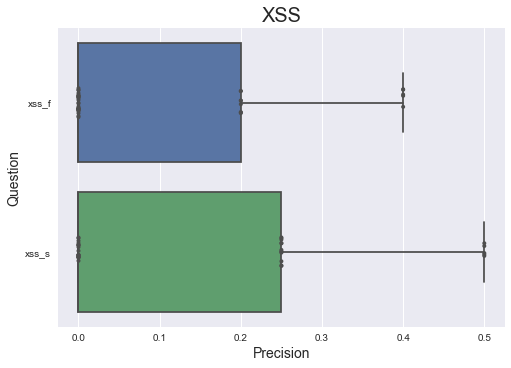

In [274]:
def boxplot_per_question(df, q, metric, title='', xlabel='Precision', ylabel='Question'):
    sns.boxplot(data=df[[q+metric, q]], x=q+metric, y=q)

    # Add in points to show each observation
    sns.stripplot(data=df[[q+metric, q]], x=q+metric, y=q,
                size=4, color=".3", linewidth=0)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.show()

for q in question:
    boxplot_per_question(df_answer_new, q, 'Precision', title=q)

In [466]:
for q in question:
    print(df_answer_new[['Which Group',q,q+'BoolCorrect',q+'BoolCorrectOuter']].groupby(['Which Group',q]).agg('mean'))

                   DoSBoolCorrect  DoSBoolCorrectOuter
Which Group DoS                                       
Group1      dos_s        0.200000             0.300000
Group2      dos_f        0.166667             0.166667
Group3      dos_f        0.187500             0.187500
Group4      dos_s        0.375000             0.437500
Group5      dos_f        0.000000             0.000000
Group6      dos_s        0.333333             0.333333
                    PathBoolCorrect  PathBoolCorrectOuter
Which Group Path                                         
Group1      path_f         0.100000              0.300000
Group2      path_s         0.250000              0.500000
Group3      path_s         0.250000              0.687500
Group4      path_f         0.125000              0.312500
Group5      path_f         0.125000              0.125000
Group6      path_s         0.066667              0.533333
                       InjectionBoolCorrect  InjectionBoolCorrectOuter
Which Group Injection    

In [481]:
for q in question:
    print([round(x,5) for x in df_answer_new[['Which Group',q ,q+'BoolCorrect',q+'BoolCorrectOuter']].groupby(['Which Group',q]).std()[q+'BoolCorrectOuter'].to_list()])

[0.48305, 0.38925, 0.40311, 0.51235, 0.0, 0.48795]
[0.48305, 0.52223, 0.47871, 0.47871, 0.35355, 0.5164]
[0.5164, 0.49237, 0.44721, 0.47871, 0.53452, 0.5164]
[0.48305, 0.45227, 0.51235, 0.40311, 0.51755, 0.5164]


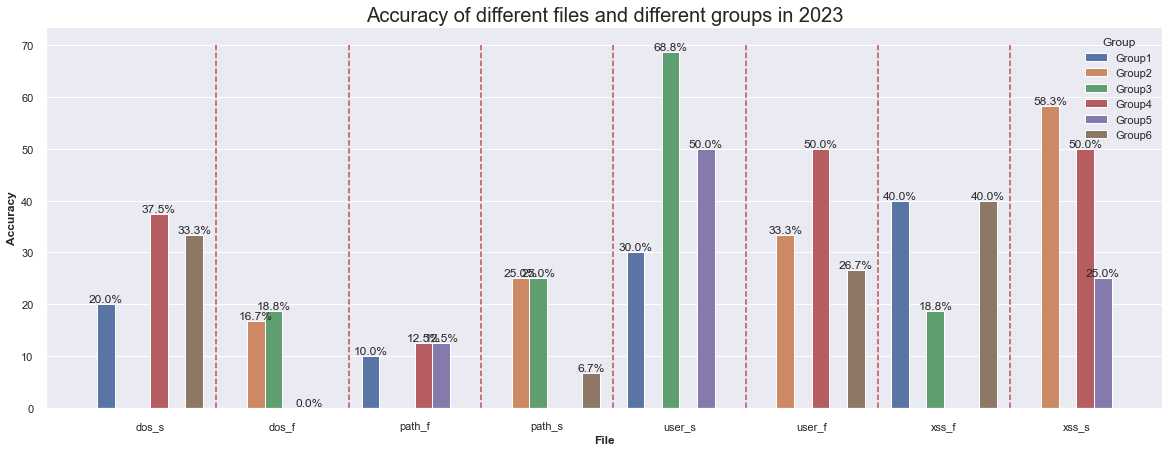

In [391]:
columns = ['Group','Question','Accuracy','OuterAccuracy']
df_question = pd.DataFrame(columns=columns)
for q in question:
    df_q = df_answer_new[['Which Group',q,q+'BoolCorrect',q+'BoolCorrectOuter']].groupby(['Which Group',q]).agg('mean').reset_index()
    df_q.columns = columns
    df_question = pd.concat([df_question, df_q])
df_question.reset_index(drop=True,inplace=True)
df_question['Accuracy'] = 100*df_question['Accuracy']
df_question['OuterAccuracy'] = 100*df_question['OuterAccuracy']

plt.figure(figsize=(20, 7))
g = sns.barplot(x="Question", y="Accuracy", hue="Group", data=df_question, ci=None)
g.set_title("Accuracy of different files and different groups in 2023", fontsize=20)
# g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("File", fontweight='bold')
g.set_ylabel("Accuracy", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%')

plt.vlines(0.5, 0, 70, 'r', '--', label='example')
plt.vlines(1.5, 0, 70, 'r', '--', label='example')
plt.vlines(2.5, 0, 70, 'r', '--', label='example')
plt.vlines(3.5, 0, 70, 'r', '--', label='example')
plt.vlines(4.5, 0, 70, 'r', '--', label='example')
plt.vlines(5.5, 0, 70, 'r', '--', label='example')
plt.vlines(6.5, 0, 70, 'r', '--', label='example')

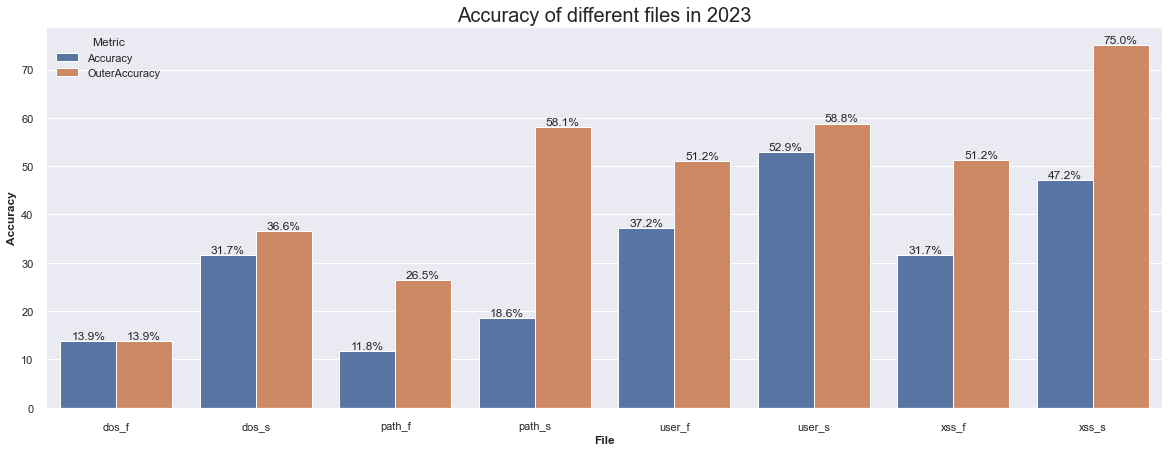

In [490]:
columns = ['Question','Accuracy','OuterAccuracy']
df_question = pd.DataFrame(columns=columns)
for q in question:
    df_q = df_answer_new[[q,q+'BoolCorrect',q+'BoolCorrectOuter']].groupby([q]).agg('mean').reset_index()
    df_q.columns = columns
    df_question = pd.concat([df_question, df_q])
df_question.reset_index(drop=True,inplace=True)
df_question['Accuracy'] = 100*df_question['Accuracy']
df_question['OuterAccuracy'] = 100*df_question['OuterAccuracy']
df_question1 = df_question[['Question','Accuracy']]
df_question1['Metric'] = 'Accuracy'
df_question2 = df_question[['Question','OuterAccuracy']]
df_question2['Metric'] = 'OuterAccuracy'
df_question2.rename(columns={'OuterAccuracy':'Accuracy'},inplace=True)
df_question_new = pd.concat([df_question1,df_question2],ignore_index=True)
df_question_new

plt.figure(figsize=(20, 7))
g = sns.barplot(x="Question", y="Accuracy", hue="Metric", data=df_question_new, ci=None)
g.set_title("Accuracy of different files in 2023", fontsize=20)
# g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("File", fontweight='bold')
g.set_ylabel("Accuracy", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%')

In [492]:
df_question['Accuracy'] = df_question['Accuracy'] / 100

MannwhitneyuResult(statistic=0.0, pvalue=1.0)

In [515]:
df_question[df_question.index%2==0]

,Question,Accuracy,OuterAccuracy
0,dos_f,0.138889,0.138889
2,path_f,0.117647,0.264706
4,user_f,0.372093,0.511628
6,xss_f,0.317073,0.512195


In [510]:
import scipy.stats as stats

# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(x=df_question[df_question.index%2==0]['Accuracy'].astype(float), y=df_question[df_question.index%2==1]['Accuracy'], alternative = 'greater')


MannwhitneyuResult(statistic=3.5, pvalue=0.9267554080323958)

In [511]:
df_question['OuterAccuracy'] = df_question['OuterAccuracy'] / 100
stats.mannwhitneyu(x=df_question[df_question.index%2==0]['OuterAccuracy'].astype(float), y=df_question[df_question.index%2==1]['OuterAccuracy'].astype(float), alternative = 'greater')

MannwhitneyuResult(statistic=2.0, pvalue=0.9714285714285713)

In [48]:
experiment_data.where(experiment_data['Which Group']=='Group3')[['Which Group','Q49_4']].dropna()

,Which Group,Q49_4
1,Group3,Amin
5,Group3,Abhilash
6,Group3,Tim
9,Group3,Nina
11,Group3,Bogdan
19,Group3,Lu
20,Group3,Anastasios
23,Group3,Sreenidhi
29,Group3,Alina
33,Group3,Jagriti


In [382]:
df_2022 = pd.read_excel('data/Copy of Old-E2a-Finding-Vulnerabilities.xlsx')

In [379]:
df_2022.columns

Index(['Duration (in seconds)', 'ResponseId', 'Unnamed: 2', 'Which Group',
       'Timing_First Click', 'Timing_Last Click', 'Timing_Page Submit',
       'Timing_Click Count', 'Group1Code_1', 'Group1Code_2', 'Group1Code_3',
       'Group1Code_5', 'Group2Code_1', 'Group2Code_2', 'Group2Code_3',
       'Group2Code_5', 'Group3Code_1', 'Group3Code_2', 'Group3Code_3',
       'Group3Code_5', 'Group4Code_1', 'Group4Code_2', 'Group4Code_3',
       'Group4Code_5', 'Group5Code_1', 'Group5Code_2', 'Group5Code_3',
       'Group5Code_5', 'Group6Code_1', 'Group6Code_2', 'Group6Code_3',
       'Group6Code_5', 'Familiar.Java', 'Familiar.Vuln', 'Difficulty.Marks_1',
       'Difficulty.Marks_2', 'Difficulty.Marks_3', 'Difficulty.Marks_4',
       'Difficulty.Correct_1', 'Difficulty.Correct_2', 'Difficulty.Correct_3',
       'Difficulty.Correct_4', 'Process.Understand', 'Process.Time',
       'Process.Training', 'Process.Material', 'Process.remarks'],
      dtype='object')

In [461]:
question_list = ['Path', 'XSS', 'Injection', 'DoS']
df_1_data_2022 = df_2022.iloc[1:,8:12]
df_1_data_2022.columns = [question_list]
df_1_data_2022.dropna(how='all', inplace=True)
df_1_data_2022['Group'] = 'Group1'

df_2_data_2022 = df_2022.iloc[1:,12:16]
df_2_data_2022.columns = [question_list]
df_2_data_2022.dropna(how='all', inplace=True)
df_2_data_2022['Group'] = 'Group2'

df_3_data_2022 = df_2022.iloc[1:,16:20]
df_3_data_2022.columns = [question_list]
df_3_data_2022.dropna(how='all', inplace=True)
df_3_data_2022['Group'] = 'Group3'

df_4_data_2022 = df_2022.iloc[1:,20:24]
df_4_data_2022.columns = [question_list]
df_4_data_2022.dropna(how='all', inplace=True)
df_4_data_2022['Group'] = 'Group4'

df_5_data_2022 = df_2022.iloc[1:,24:28]
df_5_data_2022.columns = [question_list]
df_5_data_2022.dropna(how='all', inplace=True)
df_5_data_2022['Group'] = 'Group5'

df_6_data_2022 = df_2022.iloc[1:,28:32]
df_6_data_2022.columns = [question_list]
df_6_data_2022.dropna(how='all', inplace=True)
df_6_data_2022['Group'] = 'Group6'

df_valid_data_2022 = pd.concat([df_1_data_2022, df_2_data_2022, df_3_data_2022, df_4_data_2022, df_5_data_2022, df_6_data_2022]).reset_index()
df_answer_2022 = df_valid_data_2022[['Group', 'index']]
for q in question_list:
    print(q)
    answer_series = df_valid_data_2022[q].squeeze()
    df_answer_2022 = df_answer_2022.merge(answer_series.str.split(';').apply(preprocess).rename(q+'Answer').squeeze(), left_index=True, right_index=True)
df_answer_2022

Path
XSS
Injection
DoS


,"(Group,)","(index,)",PathAnswer,XSSAnswer,InjectionAnswer,DoSAnswer
0,Group1,6,"[200, 225, 228]",[87],"[466, 468, 480, 482]","[72, 108, 150]"
1,Group1,22,"[854, 348, 928, 930]","[59, 62]","[441, 444, 451, 468]","[50, 51]"
2,Group1,28,[853],[66],"[360, 364]",[205]
3,Group1,32,[348],[62],"[441, 444]",[177]
4,Group1,33,[],[],[],[]
5,Group1,40,"[19, 20, 21, 22, 23, 24, 25, 26, 27, 28]","[89, 90, 91]","[450, 451]",[50]
6,Group1,46,"[448, 466, 471]","[62, 87, 90, 93, 94]","[445, 447, 451]",[]
7,Group1,48,[483],[67],[],[]
8,Group2,17,"[111, 114, 119, 120]","[144, 148, 151, 153]","[73, 74, 75, 76]","[239, 245, 274, 325, 327, 328, 330, 378]"
9,Group2,18,"[91, 93]","[111, 112, 151, 166]","[66, 67, 68, 69, 73, 74, 75, 76]","[360, 362, 363, 369, 370, 371, 372, 602, 605, ..."


dos_f.java: line 463, 475 <br />
dos_s.java: line 51, 55 <br />
path_f.java: line 368,369,370 <br />
path_s.java: line 76 <br />
user_f.java: line 147,148,151,153,159,163 <br />
user_s.java: line 61,62,66 <br />
xss_f.java: line 441,444,445,446,447 <br />
xss_s.java: line 73,74,75,76 <br />

Group1: dos_s.java; path_f.java; user_s.java; xss_f.java <br />
Group2: dos_f.java; path_s.java; user_f.java; xss_s.java <br />
Group3: dos_f.java; path_s.java; user_s.java; xss_f.java <br />
Group4: dos_s.java; path_f.java; user_f.java; xss_s.java <br />
Group5: dos_f.java; path_f.java; user_s.java; xss_s.java <br />
Group6: dos_s.java; path_s.java; user_f.java; xss_f.java <br />


In [462]:
question = ['DoS','Path','Injection','XSS']
df_answer_2022.columns = ['Group', 'index', 'PathAnswer', 'XSSAnswer', 'InjectionAnswer', 'DoSAnswer']
df_question_code_2022 = pd.DataFrame(df_answer_2022['Group'].map(group).to_list(), columns=question)
df_answer_new_2022 = df_answer_2022.merge(df_question_code_2022, left_index=True, right_index=True)
for q in question:
    df_answer_new_2022[q+'GT'] = df_answer_new_2022[q].map(gt)
    df_answer_new_2022[q+'GTOuter'] = df_answer_new_2022[q].map(gt_outer)
    df_answer_new_2022[q+'GTCount'] = df_answer_new_2022[q+'GT'].apply(lambda x:len(x))
    df_answer_new_2022[q+'GTOuterCount'] = df_answer_new_2022[q+'GTOuter'].apply(lambda x:len(x))

for q in question:
    df_answer_new_2022[q+'CorrectCount'] = [len(set(a).intersection(b)) for a, b in zip(df_answer_new_2022[q+'GT'], df_answer_2022[q+'Answer'])]
    df_answer_new_2022[q+'CorrectOuterCount'] = [len(set(a).intersection(b)) for a, b in zip(df_answer_new_2022[q+'GTOuter'], df_answer_2022[q+'Answer'])]


,Which Group,Q49_4,PathLinesAnswer,InjectionLinesAnswer,XSSLinesAnswer,DoSLinesAnswer,DoS,Path,Injection,XSS,...,InjectionAnswerAccuracy,XSSAnswerAccuracy,DoSAnswerRecall,PathAnswerRecall,InjectionAnswerRecall,XSSAnswerRecall,DoSOuterAnswerRecall,PathOuterAnswerRecall,InjectionOuterAnswerRecall,XSSOuterAnswerRecall
0,Group3,Amin,[],"[86, 87, 88, 89, 90, 91, 92]","[345, 346, 347, 348, 349, 350, 351, 352, 353, ...","[413, 414, 415, 416, 417, 418, 419, 420, 421, ...",dos_f,path_s,user_s,xss_f,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Group6,Zongayao,[75],"[142, 274, 290]",[347],[68],dos_s,path_s,user_f,xss_f,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.0
2,Group4,Sanskar,"[76, 112, 157, 180, 212]",[151],[88],"[76, 112, 157, 180, 212]",dos_s,path_f,user_f,xss_s,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0
3,Group6,Vishnu Dev,[114],[180],[342],[68],dos_s,path_s,user_f,xss_f,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Group3,Abhilash,"[119, 121]",[89],"[434, 445]",[438],dos_f,path_s,user_s,xss_f,...,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.000000,1.0


,Group,index,PathAnswer,XSSAnswer,InjectionAnswer,DoSAnswer,DoS,Path,Injection,XSS,...,InjectionFP,InjectionPrecision,InjectionOuterPrecision,InjectionBoolCorrect,InjectionBoolCorrectOuter,XSSFP,XSSPrecision,XSSOuterPrecision,XSSBoolCorrect,XSSBoolCorrectOuter
0,Group1,6,"[200, 225, 228]",[87],"[466, 468, 480, 482]","[72, 108, 150]",dos_s,path_f,user_s,xss_f,...,3,0.0,0.0,0,0,5,0.0,0.0,0,0
1,Group1,22,"[854, 348, 928, 930]","[59, 62]","[441, 444, 451, 468]","[50, 51]",dos_s,path_f,user_s,xss_f,...,3,0.0,0.0,0,0,5,0.0,0.0,0,0
2,Group1,28,[853],[66],"[360, 364]",[205],dos_s,path_f,user_s,xss_f,...,3,0.0,0.0,0,0,5,0.0,0.0,0,0
3,Group1,32,[348],[62],"[441, 444]",[177],dos_s,path_f,user_s,xss_f,...,3,0.0,0.0,0,0,5,0.0,0.0,0,0
4,Group1,33,[],[],[],[],dos_s,path_f,user_s,xss_f,...,3,0.0,0.0,0,0,5,0.0,0.0,0,0


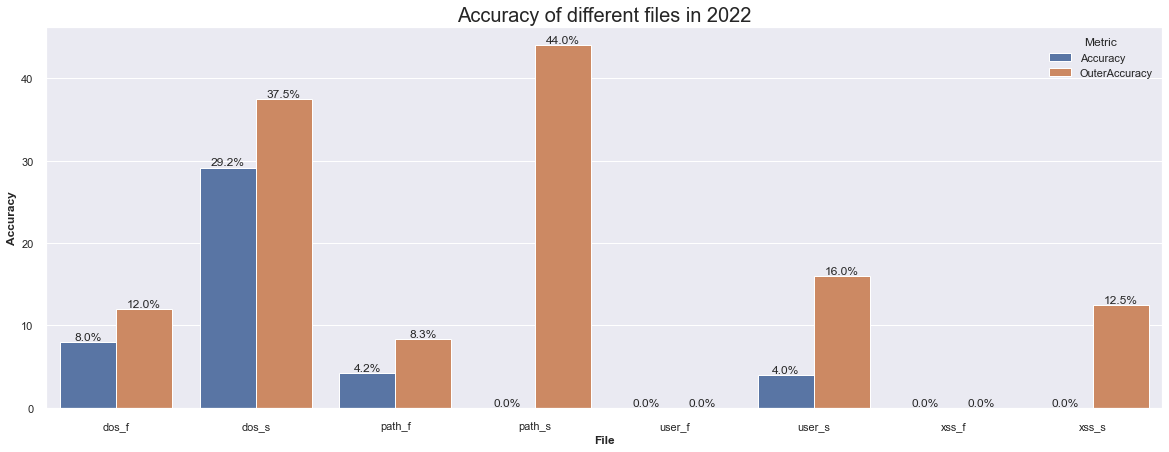

In [465]:
# df_answer['DoSLinesAnswer'].apply(lambda x:len(set(x).intersection(gt.get('dos_f'))))
for q in question:
    df_answer_new_2022[q+'FP'] = df_answer_new_2022[q+'GTCount'] - df_answer_new_2022[q+'CorrectCount']
    df_answer_new_2022[q+'Precision'] = df_answer_new_2022[q+'CorrectCount'] / df_answer_new_2022[q+'GTCount']
    df_answer_new_2022[q+'OuterPrecision'] = df_answer_new_2022[q+'CorrectOuterCount'] / df_answer_new_2022[q+'GTOuterCount']
    df_answer_new_2022[q+'BoolCorrect'] = df_answer_new_2022[q+'CorrectCount'].apply(lambda x: min(x,1))
    df_answer_new_2022[q+'BoolCorrectOuter'] = df_answer_new_2022[q+'CorrectOuterCount'].apply(lambda x: min(x,1))

columns = ['Question','Accuracy','OuterAccuracy']
df_question = pd.DataFrame(columns=columns)
for q in question:
    df_q = df_answer_new_2022[[q,q+'BoolCorrect',q+'BoolCorrectOuter']].groupby([q]).agg('mean').reset_index()
    df_q.columns = columns
    df_question = pd.concat([df_question, df_q])
df_question.reset_index(drop=True,inplace=True)
df_question['Accuracy'] = 100*df_question['Accuracy']
df_question['OuterAccuracy'] = 100*df_question['OuterAccuracy']
df_question1 = df_question[['Question','Accuracy']]
df_question1['Metric'] = 'Accuracy'
df_question2 = df_question[['Question','OuterAccuracy']]
df_question2['Metric'] = 'OuterAccuracy'
df_question2.rename(columns={'OuterAccuracy':'Accuracy'},inplace=True)
df_question_new = pd.concat([df_question1,df_question2],ignore_index=True)
df_question_new

plt.figure(figsize=(20, 7))
g = sns.barplot(x="Question", y="Accuracy", hue="Metric", data=df_question_new, ci=None)
g.set_title("Accuracy of different files in 2022", fontsize=20)
# g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("File", fontweight='bold')
g.set_ylabel("Accuracy", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%')
df_answer_new_2022.head()